# introduction
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

# Data sources:

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


In [17]:
#data import and libaray import
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df_obv = pd.read_csv('Observations.csv')
df_spec = pd.read_csv('Species_info.csv')

In [3]:
#reviewing column headers
print(df_obv.columns)
print(df_spec.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [5]:
#High level data look
print(df_obv.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [7]:
print(df_spec.head(100))

   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
..      ...                            ...   
95     Bird              Buteo jamaicensis   
96     Bird                 Buteo lineatus   
97     Bird              Buteo platypterus   
98     Bird                 Circus cyaneus   
99     Bird           Elanoides forficatus   

                                         common_names conservation_status  
0                            Gapper's Red-Backed Vole                 NaN  
1                               American Bison, Bison                 NaN  
2   Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                       Wapiti Or Elk              

In [8]:
conservation_counts = df_spec['conservation_status'].value_counts()

# Print the frequency of each conservation status
print(conservation_counts)


Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [10]:
# Assuming 'conservation_status' is the column name
conservation_stats = df_spec['conservation_status'].describe()

# Print the descriptive statistics
print(conservation_stats)

count                    191
unique                     4
top       Species of Concern
freq                     161
Name: conservation_status, dtype: object


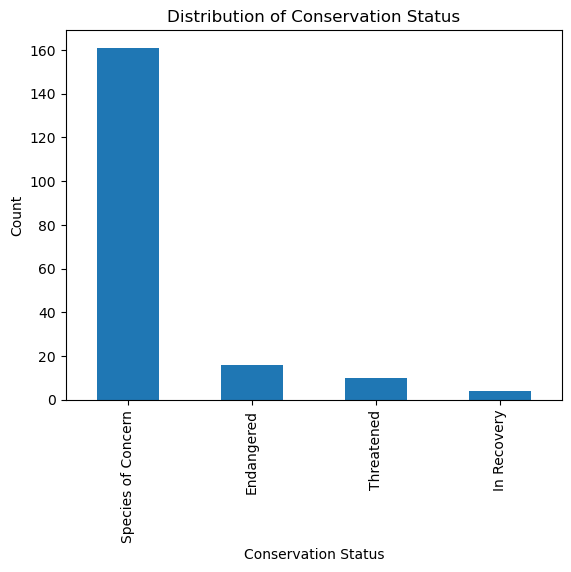

In [14]:
conservation_distribution = df_spec['conservation_status'].value_counts()
conservation_distribution.plot(kind='bar')
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

In [15]:
# Group species by their categories and conservation statuses, then count the occurrences
conservation_distribution_by_category = df_spec.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
conservation_distribution_by_category = conservation_distribution_by_category.div(conservation_distribution_by_category.sum(axis=1), axis=0)

# Print the normalized distribution of conservation statuses for each category
print(conservation_distribution_by_category)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian              0.142857     0.000000            0.571429    0.285714
Bird                   0.050633     0.037975            0.911392    0.000000
Fish                   0.272727     0.000000            0.363636    0.363636
Mammal                 0.184211     0.026316            0.736842    0.052632
Nonvascular Plant      0.000000     0.000000            1.000000    0.000000
Reptile                0.000000     0.000000            1.000000    0.000000
Vascular Plant         0.021739     0.000000            0.934783    0.043478


In [18]:
# Create a contingency table
contingency_table = pd.crosstab(df_spec['category'], df_spec['conservation_status'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 53.91636314015659
P-value: 1.8909788349761653e-05


In [19]:
# Step 1: Calculate total number of observations for each species
species_observation_counts = df_obv.groupby('scientific_name')['observations'].sum()

# Step 2: Identify the species with the highest number of observations
most_prevalent_species = species_observation_counts.idxmax()
max_observations = species_observation_counts.max()

print("Most prevalent species:", most_prevalent_species)
print("Number of observations:", max_observations)

# Step 3: Filter observations of the most prevalent species
observations_most_prevalent_species = df_obv[df_obv['scientific_name'] == most_prevalent_species]

# Step 4: Calculate distribution of observations among parks
distribution_among_parks = observations_most_prevalent_species.groupby('park_name')['observations'].sum()

print("\nDistribution of observations among parks:")
print(distribution_among_parks)


Most prevalent species: Streptopelia decaocto
Number of observations: 1785

Distribution of observations among parks:
park_name
Bryce National Park                    301
Great Smoky Mountains National Park    256
Yellowstone National Park              771
Yosemite National Park                 457
Name: observations, dtype: int64
